## NLP applying Latent Semantic Analysis (with truncated svd) and Latent Dirichlet Allocation
## with count + tfidf vecorizers

In [1]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
import numpy as np
import nltk


In [27]:
with open('neutral_politics_top_100_comment_bodies_clean.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
with open('russian_troll_tweets_clean', 'rb') as f:
    data2 = pickle.load(f)

In [4]:
len(data)

30530

In [5]:
len(data2)

355704

In [6]:
#Reduced data so things don't take so long
data = list(np.random.choice(data, size=15000))
data2 = list(np.random.choice(data2, size=15000))

In [7]:
data.extend(data2)
len(data)

30000

In [8]:
count_vectorizer = CountVectorizer(ngram_range = (1, 3), stop_words='english', max_df = .999, min_df = .001 )
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 3), stop_words='english', min_df = .001)

In [28]:
count_vectorizer.fit(data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.999, max_features=None, min_df=0.001,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [29]:
tfidf_vectorizer.fit(data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.001,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [11]:
tfidf_counts = tfidf_vectorizer.transform(data).transpose()
cv_counts = count_vectorizer.transform(data).transpose()

In [30]:
tfidf_counts = tfidf_vectorizer.transform(data).transpose()
tfidf_corpus = gensim.matutils.Sparse2Corpus(tfidf_counts)
tfidf_id2word = { identifier: word for word, identifier in tfidf_vectorizer.vocabulary_.items()}


In [31]:
tfidf_lda = gensim.models.LdaModel(corpus=tfidf_corpus, num_topics=15, minimum_probability=0.001,
                                   id2word=tfidf_id2word, passes=10)
tfidf_lda.print_topics()

[(0,
  '0.026*"gun" + 0.015*"suicide" + 0.014*"guns" + 0.012*"rate" + 0.010*"people" + 0.008*"mental" + 0.007*"gun control" + 0.007*"australia" + 0.007*"control" + 0.006*"study"'),
 (1,
  '0.022*"tax" + 0.016*"thank" + 0.010*"cuts" + 0.009*"debt" + 0.007*"fixed" + 0.007*"tax cuts" + 0.007*"restored" + 0.006*"budget" + 0.006*"spending" + 0.006*"supply"'),
 (2,
  '0.051*"comment" + 0.034*"removed" + 0.028*"source" + 0.028*"sources" + 0.027*"thanks" + 0.026*"rule" + 0.015*"link" + 0.014*"edited" + 0.014*"sorry" + 0.013*"comment removed"'),
 (3,
  '0.008*"pay" + 0.007*"isps" + 0.007*"neutrality" + 0.006*"net" + 0.006*"netflix" + 0.006*"internet" + 0.006*"net neutrality" + 0.005*"just" + 0.005*"people" + 0.005*"competition"'),
 (4,
  '0.029*"sub" + 0.020*"good" + 0.020*"ok" + 0.020*"neutral" + 0.017*"thanks" + 0.017*"guys" + 0.015*"glad" + 0.014*"stop" + 0.013*"fair" + 0.013*"politics"'),
 (5,
  '0.007*"just" + 0.007*"don" + 0.006*"people" + 0.006*"think" + 0.005*"like" + 0.005*"doesn" + 0.

In [32]:
cv_counts = count_vectorizer.transform(data).transpose()
cv_corpus = gensim.matutils.Sparse2Corpus(cv_counts)
cv_id2word = { identifier: word for word, identifier in count_vectorizer.vocabulary_.items()}


In [15]:
cv_lda = gensim.models.LdaModel(corpus=cv_corpus, num_topics=15, minimum_probability=0.001,
                                id2word=cv_id2word, passes=10)
cv_lda.print_topics()

[(0,
  '0.082*"на" + 0.042*"не" + 0.026*"comment" + 0.025*"за" + 0.024*"что" + 0.023*"по" + 0.019*"gt" + 0.018*"thank" + 0.018*"removed" + 0.017*"сша"'),
 (1,
  '0.020*"trump" + 0.016*"vote" + 0.012*"change" + 0.010*"party" + 0.010*"obama" + 0.008*"republicans" + 0.008*"politics" + 0.008*"new" + 0.008*"policy" + 0.007*"china"'),
 (2,
  '0.033*"like" + 0.024*"just" + 0.020*"look" + 0.020*"charlottesville" + 0.020*"time" + 0.016*"ll" + 0.014*"work" + 0.013*"won" + 0.011*"looks" + 0.011*"sure"'),
 (3,
  '0.031*"enlist" + 0.018*"internet" + 0.015*"market" + 0.014*"free" + 0.012*"companies" + 0.012*"finance" + 0.011*"netflix" + 0.010*"want" + 0.010*"neutrality" + 0.010*"usfa"'),
 (4,
  '0.022*"sports" + 0.019*"new" + 0.018*"school" + 0.015*"state" + 0.013*"federal" + 0.012*"lose" + 0.011*"di" + 0.010*"money" + 0.010*"court" + 0.009*"weight"'),
 (5,
  '0.040*"breaking" + 0.036*"news" + 0.029*"gun" + 0.020*"good" + 0.015*"guns" + 0.015*"love" + 0.015*"fake" + 0.014*"just" + 0.014*"cops" + 0.0

In [16]:
from sklearn.decomposition import PCA, TruncatedSVD

In [17]:
svd = TruncatedSVD()
cv_svd_data = svd.fit_transform(cv_counts)
tfidf_svd_data = svd.fit_transform(tfidf_counts)

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_cv_svd = tsne.fit_transform(cv_svd_data)
tsne_tfidf_svd = tsne.fit_transform(tfidf_svd_data)

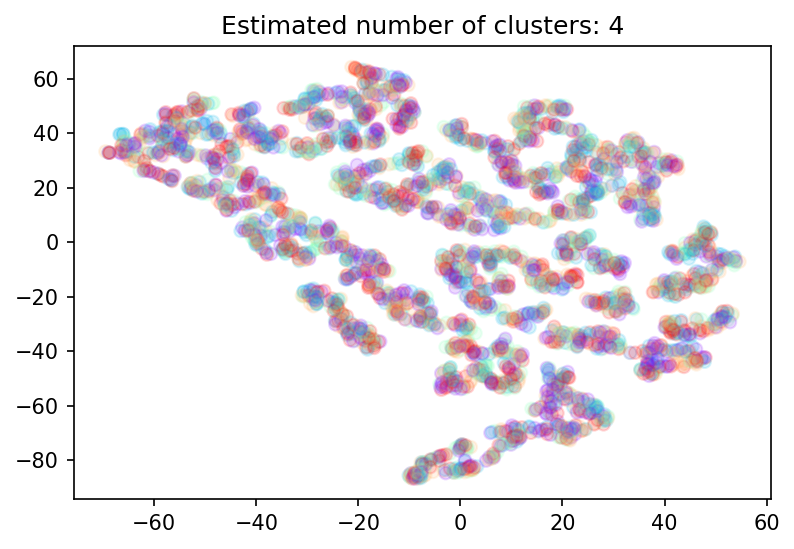

In [19]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=.9, min_samples=10).fit(tsne_cv_svd)

plt.figure(dpi=150)

labels = db.labels_
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

plt.scatter(tsne_cv_svd[:, 0], tsne_cv_svd[:, 1], c=colors, cmap=plt.cm.Set1, alpha=0.15);
plt.clim(-0.5, 9.5)
#plt.colorbar();

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plt.title('Estimated number of clusters: %d' % n_clusters_);

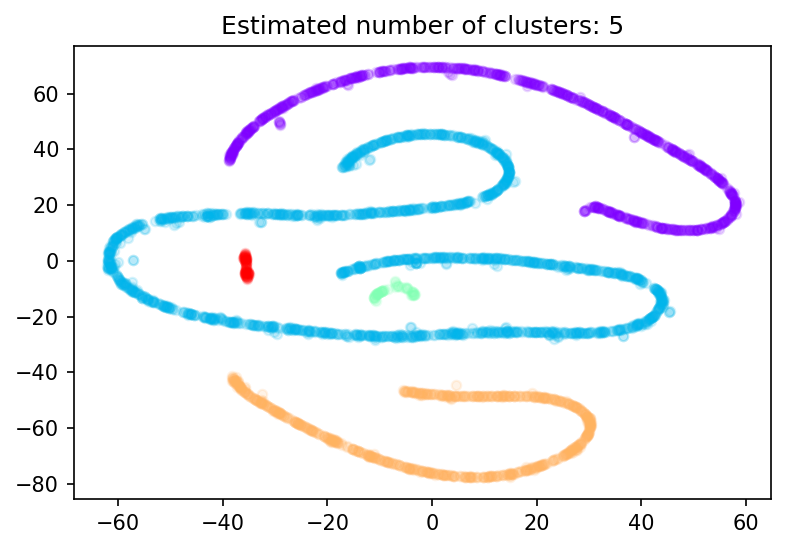

In [26]:
db = DBSCAN(eps=5, min_samples=10).fit(tsne_tfidf_svd)

plt.figure(dpi=150)

labels = db.labels_
unique_labels = set(labels)
#print(unique_labels)

colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels) - 1))
#print(colors)

#plt.scatter(tsne_tfidf_svd[:, 0], tsne_tfidf_svd[:, 1], c=colors, cmap=plt.cm.Set1, alpha=0.15);
#plt.clim(-0.5, 9.5)


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    xy = tsne_tfidf_svd[class_member_mask]
    x, y = xy[:,0], xy[:,1]
    plt.scatter(x, y, c=col, s=20, linewidths=1.1, alpha=0.15)

plt.title('Estimated number of clusters: %d' % n_clusters_);

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plt.title('Estimated number of clusters: %d' % n_clusters_);

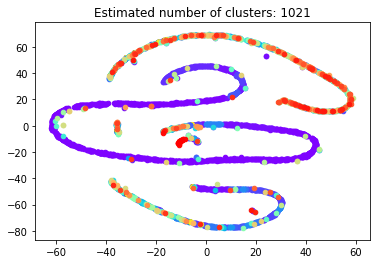

In [21]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    xy = tsne_tfidf_svd[class_member_mask]
    x, y = xy[:,0], xy[:,1]
    plt.scatter(x, y, c=col, s=20, linewidths=1.1)

plt.title('Estimated number of clusters: %d' % n_clusters_);